<a href="https://colab.research.google.com/github/seunga2590/Machine-Learning/blob/main/LSTM_0507.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import glob
import sys

all_data = pd.DataFrame()
for f in glob.glob('/content/drive/My Drive/air_pollution/air_*.xlsx'):
  df = pd.read_excel(f)
  all_data = all_data.append(df, ignore_index=True)

print(all_data.shape)
all_data.head()
all_data

(2012160, 9)


,지역,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25
0,서울,중구,2015010101,0.006,0.6,0.022,0.011,44.0,7.0
1,서울,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0
2,서울,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0
3,서울,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0
4,서울,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0
...,...,...,...,...,...,...,...,...,...
2012155,서울 노원구,노원,2020103120,0.003,0.5,0.013,0.051,NaN,NaN
2012156,서울 노원구,노원,2020103121,0.003,0.5,0.017,0.040,NaN,NaN
2012157,서울 노원구,노원,2020103122,0.003,0.5,0.014,0.043,NaN,NaN
2012158,서울 노원구,노원,2020103123,0.003,0.6,0.012,0.045,NaN,NaN


###강남구

In [3]:
all_data1 = all_data.rename(columns={"측정일시":"date"})

In [4]:
gangnam = all_data1['측정소명'] == '강남'
air_gang = all_data1[gangnam]
air_gang1 = air_gang.drop(['지역','측정소명'], axis=1)
air_gang1.head()

,date,SO2,CO,O3,NO2,PM10,PM25
58320,2015010101,0.006,0.2,0.026,0.011,42.0,24.0
58321,2015010102,0.005,0.2,0.025,0.010,54.0,12.0
58322,2015010103,0.005,0.2,0.024,0.010,73.0,19.0
58323,2015010104,0.007,0.2,0.025,0.008,89.0,18.0
58324,2015010105,0.006,0.2,0.025,0.008,106.0,23.0


In [5]:
air_gang1 = air_gang1.sort_values(by=['date'], axis=0)
air_gang1

,date,SO2,CO,O3,NO2,PM10,PM25
58320,2015010101,0.006,0.2,0.026,0.011,42.0,24.0
62640,2015010101,0.006,0.7,0.011,0.012,39.0,NaN
62641,2015010102,0.006,0.7,0.011,0.011,59.0,NaN
58321,2015010102,0.005,0.2,0.025,0.010,54.0,12.0
58322,2015010103,0.005,0.2,0.024,0.010,73.0,19.0
...,...,...,...,...,...,...,...
2004717,2020103122,0.004,1.0,0.020,0.032,31.0,13.0
2004718,2020103123,0.004,1.0,0.016,0.036,37.0,13.0
2003230,2020103123,0.003,0.4,0.029,0.022,24.0,14.0
2003231,2020103124,0.004,0.4,0.029,0.020,22.0,15.0


In [6]:
air_gang2 = air_gang1.groupby('date').mean()
air_gang3 = air_gang2.reset_index()
air_gang4 = air_gang3[:51143]
air_gang4 = air_gang4.reset_index()

In [7]:
col_names2 = ['date','tem','rain','wind_s','wind_d','hum','pre']
df_atm = pd.read_excel("/content/drive/My Drive/parameter/parameter_sum.xlsx",names = col_names2)
df_atm1 = df_atm[:51143]
df_atm2 = df_atm1.reset_index()

In [8]:
jung_atm = pd.read_excel('/content/drive/My Drive/lab/jung_sum_2.xlsx', index_col=0)
jung_atm = jung_atm[:51143]

In [9]:
df_atm2['PM10'] = air_gang3['PM10']
df_atm2['PM25'] = air_gang3['PM25']
df_atm2['SO2'] = air_gang3['SO2']
df_atm2['CO'] = air_gang3['CO']
df_atm2['NO2'] = air_gang3['NO2']
df_atm2['O3'] = air_gang3['O3']
df_atm2['wind_s'] = jung_atm['wind_x']
df_atm2['wind_d'] = jung_atm['wind_y']
df_atm2.head()

,index,date,tem,rain,wind_s,wind_d,hum,pre,PM10,PM25,SO2,CO,NO2,O3
0,0,2015-01-01 01:00:00,-7.4,NaN,2.643416,-3.886174,33.0,1011.8,40.5,24.0,0.0060,0.45,0.0115,0.0185
1,1,2015-01-01 02:00:00,-8.0,NaN,2.530930,-3.720805,35.0,1011.7,56.5,12.0,0.0055,0.45,0.0105,0.0180
2,2,2015-01-01 03:00:00,-8.4,NaN,2.137230,-3.142013,37.0,1012.1,74.0,19.0,0.0055,0.45,0.0085,0.0180
3,3,2015-01-01 04:00:00,-8.8,NaN,2.755902,-4.051544,35.0,1012.3,89.5,18.0,0.0065,0.45,0.0065,0.0185
4,4,2015-01-01 05:00:00,-9.1,NaN,3.205845,-4.713020,35.0,1011.8,105.5,23.0,0.0060,0.50,0.0070,0.0185


In [10]:
#interpolate 선형 그래프로 결측값 보간
df_atm2 = df_atm2.interpolate(method='values')
df_atm2.head()

,index,date,tem,rain,wind_s,wind_d,hum,pre,PM10,PM25,SO2,CO,NO2,O3
0,0,2015-01-01 01:00:00,-7.4,NaN,2.643416,-3.886174,33.0,1011.8,40.5,24.0,0.0060,0.45,0.0115,0.0185
1,1,2015-01-01 02:00:00,-8.0,NaN,2.530930,-3.720805,35.0,1011.7,56.5,12.0,0.0055,0.45,0.0105,0.0180
2,2,2015-01-01 03:00:00,-8.4,NaN,2.137230,-3.142013,37.0,1012.1,74.0,19.0,0.0055,0.45,0.0085,0.0180
3,3,2015-01-01 04:00:00,-8.8,NaN,2.755902,-4.051544,35.0,1012.3,89.5,18.0,0.0065,0.45,0.0065,0.0185
4,4,2015-01-01 05:00:00,-9.1,NaN,3.205845,-4.713020,35.0,1011.8,105.5,23.0,0.0060,0.50,0.0070,0.0185


In [11]:
df_atm2 = df_atm2.rename(columns={"wind_s":"wind_x", "wind_d":"wind_y"})

In [12]:
df_atm2['rain'] = df_atm2['rain'].fillna(0)
df_atm2.head()

,index,date,tem,rain,wind_x,wind_y,hum,pre,PM10,PM25,SO2,CO,NO2,O3
0,0,2015-01-01 01:00:00,-7.4,0.0,2.643416,-3.886174,33.0,1011.8,40.5,24.0,0.0060,0.45,0.0115,0.0185
1,1,2015-01-01 02:00:00,-8.0,0.0,2.530930,-3.720805,35.0,1011.7,56.5,12.0,0.0055,0.45,0.0105,0.0180
2,2,2015-01-01 03:00:00,-8.4,0.0,2.137230,-3.142013,37.0,1012.1,74.0,19.0,0.0055,0.45,0.0085,0.0180
3,3,2015-01-01 04:00:00,-8.8,0.0,2.755902,-4.051544,35.0,1012.3,89.5,18.0,0.0065,0.45,0.0065,0.0185
4,4,2015-01-01 05:00:00,-9.1,0.0,3.205845,-4.713020,35.0,1011.8,105.5,23.0,0.0060,0.50,0.0070,0.0185


In [13]:
df_fin = df_atm2.copy()

In [14]:
pm = df_fin['PM10']
pm1 = pm[24:]
pm10 = pm1.reset_index()

df_fin['value_tomm'] = pm10['PM10']
df_fin.head()

,index,date,tem,rain,wind_x,wind_y,hum,pre,PM10,PM25,SO2,CO,NO2,O3,value_tomm
0,0,2015-01-01 01:00:00,-7.4,0.0,2.643416,-3.886174,33.0,1011.8,40.5,24.0,0.0060,0.45,0.0115,0.0185,21.0
1,1,2015-01-01 02:00:00,-8.0,0.0,2.530930,-3.720805,35.0,1011.7,56.5,12.0,0.0055,0.45,0.0105,0.0180,23.0
2,2,2015-01-01 03:00:00,-8.4,0.0,2.137230,-3.142013,37.0,1012.1,74.0,19.0,0.0055,0.45,0.0085,0.0180,25.5
3,3,2015-01-01 04:00:00,-8.8,0.0,2.755902,-4.051544,35.0,1012.3,89.5,18.0,0.0065,0.45,0.0065,0.0185,18.5
4,4,2015-01-01 05:00:00,-9.1,0.0,3.205845,-4.713020,35.0,1011.8,105.5,23.0,0.0060,0.50,0.0070,0.0185,22.5


In [15]:
df_final = df_fin.copy()
pm10 = df_final['PM10']<400.0
a = df_final['PM10'] > 400
a1 = df_final[a]
df_final1 = df_final.drop(a1.index, axis=0)
df_final1

,index,date,tem,rain,wind_x,wind_y,hum,pre,PM10,PM25,SO2,CO,NO2,O3,value_tomm
0,0,2015-01-01 01:00:00,-7.4,0.0,2.643416,-3.886174,33.0,1011.8,40.5,24.0,0.0060,0.45,0.0115,0.0185,21.0
1,1,2015-01-01 02:00:00,-8.0,0.0,2.530930,-3.720805,35.0,1011.7,56.5,12.0,0.0055,0.45,0.0105,0.0180,23.0
2,2,2015-01-01 03:00:00,-8.4,0.0,2.137230,-3.142013,37.0,1012.1,74.0,19.0,0.0055,0.45,0.0085,0.0180,25.5
3,3,2015-01-01 04:00:00,-8.8,0.0,2.755902,-4.051544,35.0,1012.3,89.5,18.0,0.0065,0.45,0.0065,0.0185,18.5
4,4,2015-01-01 05:00:00,-9.1,0.0,3.205845,-4.713020,35.0,1011.8,105.5,23.0,0.0060,0.50,0.0070,0.0185,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51138,51138,2020-10-31 19:00:00,15.2,0.0,1.656438,2.969211,62.0,10.6,27.0,15.0,0.0035,0.70,0.0295,0.0275,NaN
51139,51139,2020-10-31 20:00:00,15.1,0.0,1.364125,2.445232,59.0,10.1,24.5,12.0,0.0035,0.75,0.0315,0.0240,NaN
51140,51140,2020-10-31 21:00:00,14.9,0.0,1.315407,2.357903,58.0,9.7,25.5,13.0,0.0040,0.70,0.0275,0.0240,NaN
51141,51141,2020-10-31 22:00:00,14.9,0.0,1.266688,2.270573,57.0,9.6,27.0,14.5,0.0040,0.75,0.0285,0.0225,NaN


In [16]:
df_final2 = df_final1.set_index('date')
df_final2

,index,tem,rain,wind_x,wind_y,hum,pre,PM10,PM25,SO2,CO,NO2,O3,value_tomm
date,,,,,,,,,,,,,,
2015-01-01 01:00:00,0,-7.4,0.0,2.643416,-3.886174,33.0,1011.8,40.5,24.0,0.0060,0.45,0.0115,0.0185,21.0
2015-01-01 02:00:00,1,-8.0,0.0,2.530930,-3.720805,35.0,1011.7,56.5,12.0,0.0055,0.45,0.0105,0.0180,23.0
2015-01-01 03:00:00,2,-8.4,0.0,2.137230,-3.142013,37.0,1012.1,74.0,19.0,0.0055,0.45,0.0085,0.0180,25.5
2015-01-01 04:00:00,3,-8.8,0.0,2.755902,-4.051544,35.0,1012.3,89.5,18.0,0.0065,0.45,0.0065,0.0185,18.5
2015-01-01 05:00:00,4,-9.1,0.0,3.205845,-4.713020,35.0,1011.8,105.5,23.0,0.0060,0.50,0.0070,0.0185,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 19:00:00,51138,15.2,0.0,1.656438,2.969211,62.0,10.6,27.0,15.0,0.0035,0.70,0.0295,0.0275,NaN
2020-10-31 20:00:00,51139,15.1,0.0,1.364125,2.445232,59.0,10.1,24.5,12.0,0.0035,0.75,0.0315,0.0240,NaN
2020-10-31 21:00:00,51140,14.9,0.0,1.315407,2.357903,58.0,9.7,25.5,13.0,0.0040,0.70,0.0275,0.0240,NaN


In [17]:
df_new = df_final2.dropna(how='any')

In [18]:
train = df_new[:26283] 
val = df_new[26283:43803]
test = df_new[43803:]

In [19]:
mean = train.mean()
std = train.std()

train_scaled = (train - mean) / std
val_scaled = (val-mean) / std
test_scaled = (test-mean) / std

train_scaled = train_scaled.reset_index()
val_scaled = val_scaled.reset_index()
test_scaled = test_scaled.reset_index()

In [20]:
#def standard_scaler(dataset):
#  mean = dataset[:26303].mean(axis=0)
#  std = dataset[:26303].mean(axis=0)
#
#  dataset = (dataset-mean)/std
#
#  return dataset

In [21]:
df_new[:43665]

,index,tem,rain,wind_x,wind_y,hum,pre,PM10,PM25,SO2,CO,NO2,O3,value_tomm
date,,,,,,,,,,,,,,
2015-01-01 01:00:00,0,-7.4,0.000000,2.643416,-3.886174,33.0,1011.8,40.5,24.0,0.0060,0.45,0.0115,0.0185,21.0
2015-01-01 02:00:00,1,-8.0,0.000000,2.530930,-3.720805,35.0,1011.7,56.5,12.0,0.0055,0.45,0.0105,0.0180,23.0
2015-01-01 03:00:00,2,-8.4,0.000000,2.137230,-3.142013,37.0,1012.1,74.0,19.0,0.0055,0.45,0.0085,0.0180,25.5
2015-01-01 04:00:00,3,-8.8,0.000000,2.755902,-4.051544,35.0,1012.3,89.5,18.0,0.0065,0.45,0.0065,0.0185,18.5
2015-01-01 05:00:00,4,-9.1,0.000000,3.205845,-4.713020,35.0,1011.8,105.5,23.0,0.0060,0.50,0.0070,0.0185,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-26 06:00:00,43685,3.1,0.095652,0.823315,-1.006058,60.0,4.6,37.5,27.0,0.0030,0.95,0.0475,0.0020,34.5
2019-12-26 07:00:00,43686,3.1,0.097101,0.675476,0.183662,60.0,4.6,41.0,31.0,0.0030,0.90,0.0460,0.0020,36.5
2019-12-26 08:00:00,43687,3.2,0.098551,1.181258,0.211255,65.0,5.0,46.5,36.0,0.0030,0.90,0.0480,0.0020,37.5


In [22]:
value_tomm_pm = df_new['value_tomm']
train_y = df_new[:26178]
val_y = df_new[2618:43665]
test_y = df_new[43665:]

In [23]:
train_y = train_y.reset_index()
val_y = val_y.reset_index()
test_y = test_y.reset_index()

In [24]:
train_scaled['value_tomm'] = train_y['value_tomm']
val_scaled['value_tomm'] = val_y['value_tomm']
test_scaled['value_tomm'] = test_y['value_tomm']
train_scaled.head()

,date,index,tem,rain,wind_x,wind_y,hum,pre,PM10,PM25,SO2,CO,NO2,O3,value_tomm
0,2015-01-01 01:00:00,-1.733982,-1.868058,-0.278843,0.911571,-2.062693,-1.307842,1.428930,-0.266885,-0.068114,0.666758,-0.666270,-1.612923,-0.067566,21.0
1,2015-01-01 02:00:00,-1.733851,-1.921871,-0.278843,0.845000,-1.972162,-1.206836,1.428717,0.286811,-0.791922,0.304616,-0.666270,-1.675046,-0.099281,23.0
2,2015-01-01 03:00:00,-1.733719,-1.957747,-0.278843,0.611999,-1.655302,-1.105829,1.429570,0.892416,-0.369701,0.304616,-0.666270,-1.799293,-0.099281,25.5
3,2015-01-01 04:00:00,-1.733587,-1.993622,-0.278843,0.978143,-2.153225,-1.206836,1.429997,1.428809,-0.430018,1.028899,-0.666270,-1.923540,-0.067566,18.5
4,2015-01-01 05:00:00,-1.733455,-2.020528,-0.278843,1.244430,-2.515350,-1.206836,1.428930,1.982505,-0.128432,0.666758,-0.443648,-1.892478,-0.067566,22.5


In [25]:
train_shuffled = train_scaled.iloc[np.random.permutation(train_scaled.index)].reset_index(drop=True)
train_shuffled.head()

,date,index,tem,rain,wind_x,wind_y,hum,pre,PM10,PM25,SO2,CO,NO2,O3,value_tomm
0,2017-12-18 05:00:00,1.687387,-1.679713,0.000439,-0.315532,-0.316505,1.116317,-0.722721,-0.301491,-0.309384,0.304616,-0.888892,-0.215144,-1.114186,44.0
1,2017-02-17 15:00:00,0.727581,-0.926331,0.041864,0.512141,-1.519505,-1.459352,-0.724855,0.823204,-0.233501,-0.419667,-0.666270,-1.302305,0.693613,28.5
2,2015-07-19 01:00:00,-1.104825,0.867434,-0.278843,0.546424,0.366434,1.166820,1.404181,-0.353400,-0.068114,-0.057525,-0.888892,-1.022749,0.661897,24.0
3,2017-08-15 03:00:00,1.291925,0.831559,2.387034,0.321650,-1.036739,1.469840,-0.677917,-1.408883,-1.334778,-0.781809,-1.556759,-1.768231,-0.575018,5.5
4,2015-09-05 03:00:00,-0.952806,0.885372,-0.087538,-0.495979,0.649243,1.065813,1.405248,-0.491824,-0.430018,-0.781809,0.446841,-0.463638,0.598466,19.0


In [26]:
train_scaled = train_scaled.set_index('date').dropna(how='any')
val_scaled = val_scaled.set_index('date').dropna(how='any')
test_scaled = test_scaled.set_index('date').dropna(how='any')

In [27]:
def make_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('value_tomm')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))

  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [28]:
batch_size=256
train_ds = make_dataset(train_scaled, batch_size=batch_size)
val_ds = make_dataset(val_scaled, shuffle=False, batch_size = batch_size)
test_ds = make_dataset(test_scaled, shuffle=False, batch_size=batch_size)

In [29]:
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

feature_columns = []
for header in ['SO2'	,'CO'	,'O3',	'NO2',	'PM10',	'PM25',	'tem',	'rain',	'hum',	'pre',	'wind_x',	'wind_y']:
  feature_columns.append(feature_column.numeric_column(header))

In [30]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras import layers
from tensorflow.keras import initializers
from tensorflow import keras

initializer = tf.keras.initializers.he_normal(seed=None)

model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(units=64, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(units=32, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(units=1, activation='relu')
])
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [32]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-deepneural-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(train_ds,
          validation_data=val_ds,
          epochs=50,
          callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/50
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
100/103 [============================>.] - ETA: 0s - loss: 3258.7964 - mae: 46.1155WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'index': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=float64>, 'tem': <tf.Tensor 'ExpandDims_10:0' shape=(None, 1) dtype=float64>, 'rain': <tf.Tensor 'ExpandDims_9:0' shape=(None, 1) dtype=float64>, 'wind_x': <tf.Tensor 'ExpandDims_11:0' shape=(None, 1) dtype=float64>, 'wind_y': <tf.Tensor 'ExpandDims_12:0' shape=(None, 1) dtype=float64>, 'hum': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=float64>, 'pre': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=float64>, 'PM10': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=float64>, 'PM25': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=float64>, 'SO2': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) 

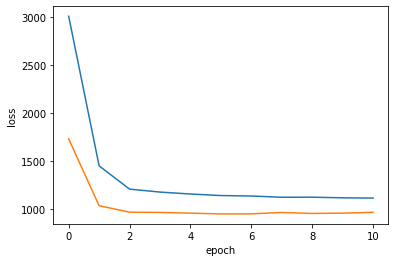

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [34]:
pred = model.predict(test_ds)

Consider rewriting this model with the Functional API.


In [35]:
plt.figure(figsize=(12,9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

NameError: ignored

<Figure size 864x648 with 0 Axes>

In [36]:
feature_col = ['PM10','PM25','SO2','CO','O3','NO2','tem','rain','hum','pre','wind_x','wind_y']
label_col = ['value_tomm']

In [37]:
train_shuffled = train_shuffled.dropna(how='any')
val_scaled = val_scaled.dropna(how='any')
test_scaled = test_scaled.dropna(how='any')

In [38]:
train_feature = train_shuffled[feature_col]
train_label = train_shuffled[label_col]
valid_feature = val_scaled[feature_col]
valid_label = val_scaled[label_col]
test_feature = test_scaled[feature_col]
test_label = test_scaled[label_col]
print(train_feature.shape, train_label.shape)
print(valid_feature.shape, valid_label.shape)
print(test_feature.shape, test_label.shape)

(26178, 12) (26178, 1)
(17520, 12) (17520, 1)
(7291, 12) (7291, 1)


In [39]:
from tensorflow.keras import layers
from tensorflow import keras

model = tf.keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_feature.shape[1],),))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model

In [40]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-deepneural-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True, monitor='val_loss')
#patience = 성능이 증가하지 않는 epoch 몇번까지 허용하는지
history = model.fit(train_feature, train_label,
          validation_data=(valid_feature,valid_label),
          epochs=50,
          callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/50
819/819 [==============================] - 2s 2ms/step - loss: 1951.9195 - mae: 29.9950 - val_loss: 935.0396 - val_mae: 22.2303
Epoch 2/50
819/819 [==============================] - 2s 2ms/step - loss: 1090.0783 - mae: 18.7700 - val_loss: 977.4740 - val_mae: 23.0002
Epoch 3/50
819/819 [==============================] - 2s 2ms/step - loss: 1025.0023 - mae: 18.3804 - val_loss: 968.0778 - val_mae: 22.9044
Epoch 4/50
819/819 [==============================] - 2s 2ms/step - loss: 929.8328 - mae: 18.0935 - val_loss: 978.2209 - val_mae: 23.1822


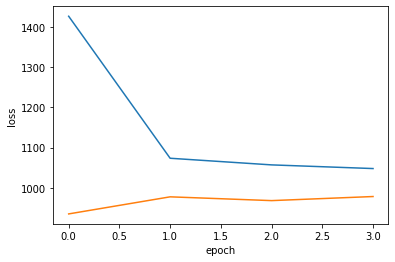

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [42]:
pred = model.predict(test_feature)
print('Loss', model.evaluate(test_feature, test_label))

228/228 [==============================] - 0s 847us/step - loss: 616.0460 - mae: 20.4131
Loss [616.0460205078125, 20.413114547729492]


In [43]:
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

ValueError: ignored

In [44]:
train = df_new[:26303]
val = df_new[26303:43823]
test = df_new[43823:]

In [45]:
mean = train.mean()
std = train.std()

train_scaled = (train - mean) / std
val_scaled = (val-mean) / std
test_scaled = (test-mean) / std

train_scaled = train_scaled.reset_index()
val_scaled = val_scaled.reset_index()
test_scaled = test_scaled.reset_index()

In [46]:
train = train.reset_index()
val = val.reset_index()
test = test.reset_index()

train_scaled['value_tomm'] = train['value_tomm']
val_scaled['value_tomm'] = val['value_tomm']
test_scaled['value_tomm'] = test['value_tomm']

In [47]:
train_shuffled = train_scaled.iloc[np.random.permutation(train_scaled.index)].reset_index(drop=True)
train_shuffled.head()

,date,index,tem,rain,wind_x,wind_y,hum,pre,PM10,PM25,SO2,CO,NO2,O3,value_tomm
0,2016-10-08 21:00:00,0.309488,0.114988,0.075307,0.379171,-1.338818,-0.145478,-0.709497,-0.353436,-0.430086,-1.144617,-0.666547,-0.991818,0.599074,23.5
1,2017-10-02 05:00:00,1.441531,0.294319,-0.278729,-0.416116,0.064783,1.520895,-0.693492,-1.357355,-1.274817,-1.144617,-0.443900,-1.613109,0.345316,41.0
2,2017-01-20 23:00:00,0.638307,-1.866621,-0.088242,0.684453,0.650920,0.510972,-0.724221,0.061978,0.655997,-0.420311,0.446685,-0.370527,-0.574558,43.5
3,2015-05-16 09:00:00,-1.306438,0.348118,-0.278729,0.512495,0.257586,-1.306889,1.407547,-0.024566,-0.611100,-0.058158,-0.221254,0.685668,-0.289080,68.0
4,2017-09-28 14:00:00,1.430079,1.029576,-0.278729,-0.153616,1.924873,-1.458377,-0.709283,-1.011176,-1.154141,-0.058158,-0.666547,-0.960753,0.947992,22.0


In [48]:
train_shuffled = train_shuffled.set_index('date')
val_scaled = val_scaled.set_index('date')
test_scaled = test_scaled.set_index('date')

In [49]:
feature_cols = ['PM10', 'PM25','SO2','CO','NO2','tem','rain','hum','pre','wind_x','wind_y']
label_cols = ['value_tomm']

In [50]:
def lstm_dataset(data, label, window_size=24):
  feature_list = []
  label_list = []

  for i in range(len(data) - window_size):
    feature_list.append(np.array(data.iloc[i:i+window_size]))
    label_list.append(np.array(label.iloc[i+window_size]))
  return np.array(feature_list), np.array(label_list)
  # window_size = timestep(몇 시간의 데이터를 이용하여 예측을 할 것인가)

In [51]:
train_feature = train_scaled[feature_cols]
train_label = train_scaled[label_cols]

train_feature, train_label = lstm_dataset(train_feature, train_label, window_size= 24)

In [52]:
train_feature.shape

(26279, 24, 11)

In [53]:
valid_feature = val_scaled[feature_cols]
valid_label = val_scaled[label_cols]

test_feature = test_scaled[feature_cols]
test_label = test_scaled[label_cols]

print(test_feature.shape, test_label.shape)

(7271, 11) (7271, 1)


In [54]:
valid_feature, valid_label = lstm_dataset(valid_feature, valid_label, window_size=24)
test_feature, test_label = lstm_dataset(test_feature, test_label, window_size=24)

In [55]:
train_feature.shape

(26279, 24, 11)

In [56]:
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras import layers

model = tf.keras.models.Sequential()
model.add(LSTM(64,
               input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(layers.Flatten(input_shape=(16,16)))
model.add(layers.Flatten(input_shape=(2,2)))
model.add(Dense(1))

In [57]:
import os
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('tmp_checkpoint.h5')
early_stop = EarlyStopping(monitor='val_loss',patience=5)

history = model.fit(train_feature, train_label,
                    epochs=50,
                    batch_size=256,
                    validation_data=(valid_feature, valid_label),
                    callbacks=[early_stop, checkpoint_cb])

Epoch 1/50
103/103 [==============================] - 11s 88ms/step - loss: 2639.4103 - mae: 37.7137 - val_loss: 749.8607 - val_mae: 19.8880
Epoch 2/50
103/103 [==============================] - 8s 81ms/step - loss: 1067.3950 - mae: 19.4053 - val_loss: 796.5875 - val_mae: 22.0654
Epoch 3/50
103/103 [==============================] - 8s 82ms/step - loss: 1006.8992 - mae: 18.9555 - val_loss: 695.0369 - val_mae: 19.3638
Epoch 4/50
103/103 [==============================] - 8s 82ms/step - loss: 912.3509 - mae: 18.9167 - val_loss: 695.1761 - val_mae: 19.3178
Epoch 5/50
103/103 [==============================] - 8s 81ms/step - loss: 980.8625 - mae: 18.6187 - val_loss: 676.2173 - val_mae: 18.5613
Epoch 6/50
103/103 [==============================] - 9s 83ms/step - loss: 787.8904 - mae: 18.1213 - val_loss: 686.4661 - val_mae: 18.3428
Epoch 7/50
103/103 [==============================] - 8s 81ms/step - loss: 820.0039 - mae: 18.1370 - val_loss: 686.1935 - val_mae: 18.4271
Epoch 8/50
103/103 [===

In [58]:
pred = model.predict(test_feature)
print('Loss', model.evaluate(test_feature, test_label))

227/227 [==============================] - 1s 6ms/step - loss: 594.1752 - mae: 18.7259
Loss [594.1751708984375, 18.72589683532715]


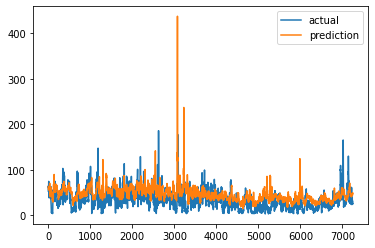

In [59]:
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [60]:
def make_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('value_tomm')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))

  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [61]:
batch_size=512
train_ds = make_dataset(train_shuffled, batch_size=batch_size)
val_ds = make_dataset(val_scaled, shuffle=False, batch_size = batch_size)
test_ds = make_dataset(test_scaled, shuffle=False, batch_size=batch_size)

In [62]:
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

In [63]:
feature_columns = []
for header in ['SO2'	,'CO'	,'O3',	'NO2',	'PM10',	'PM25',	'tem',	'rain',	'hum',	'pre',	'wind_x',	'wind_y']:
  feature_columns.append(feature_column.numeric_column(header))

In [64]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [65]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras import layers
from tensorflow.keras import initializers
initializer = tf.keras.initializers.he_normal(seed=None)

model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(units=64, kernel_initializer='he_normal',
    bias_initializer='zeros', activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(units=32, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(units=1, activation='relu')
])
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [66]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-deepneural-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_ds,
          validation_data=val_ds,
          epochs=50,
          callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/50
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
49/52 [===========================>..] - ETA: 0s - loss: 3586.5046 - mae: 47.4318WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'index': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=float64>, 'tem': <tf.Tensor 'ExpandDims_10:0' shape=(None, 1) dtype=float64>, 'rain': <tf.Tensor 'ExpandDims_9:0' shape=(None, 1) dtype=float64>, 'wind_x': <tf.Tensor 'ExpandDims_11:0' shape=(None, 1) dtype=float64>, 'wind_y': <tf.Tensor 'ExpandDims_12:0' shape=(None, 1) dtype=float64>, 'hum': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=float64>, 'pre': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=float64>, 'PM10': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=float64>, 'PM25': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=float64>, 'SO2': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dt

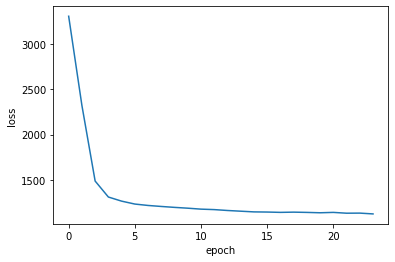

In [67]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [68]:
pred = model.predict(test_ds)

Consider rewriting this model with the Functional API.


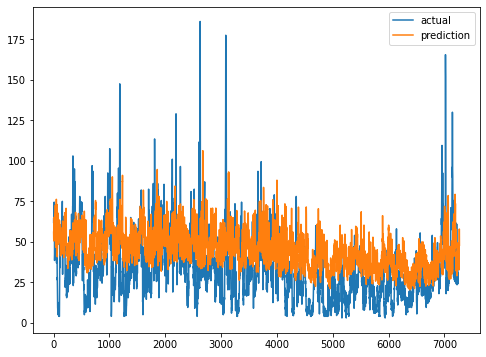

In [69]:
plt.figure(figsize=(8,6))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

#중구

In [70]:
col_names = ['seoul', 'code','loc','date','SO2','CO','O3','NO2','PM10','PM25','adr']

df = pd.read_excel('/content/drive/My Drive/Data/data_sum.xlsx', names = col_names)
df

,seoul,code,loc,date,SO2,CO,O3,NO2,PM10,PM25,adr
0,서울,111121,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0,서울 중구 덕수궁길 15
1,서울,111121,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0,서울 중구 덕수궁길 15
2,서울,111121,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0,서울 중구 덕수궁길 15
3,서울,111121,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0,서울 중구 덕수궁길 15
4,서울,111121,중구,2015010106,0.006,0.6,0.020,0.009,128.0,18.0,서울 중구 덕수궁길 15
...,...,...,...,...,...,...,...,...,...,...,...
1025850,서울 노원구,111312,화랑로,2017123120,0.004,0.5,0.014,0.030,27.0,NaN,서울 노원구 화랑로 429
1025851,서울 노원구,111312,화랑로,2017123121,0.004,0.5,0.015,0.029,26.0,NaN,서울 노원구 화랑로 429
1025852,서울 노원구,111312,화랑로,2017123122,0.005,0.5,0.014,0.027,35.0,NaN,서울 노원구 화랑로 429
1025853,서울 노원구,111312,화랑로,2017123123,0.005,0.4,0.017,0.024,36.0,NaN,서울 노원구 화랑로 429


In [71]:
df1 = pd.read_excel('/content/drive/My Drive/Data/data_sum1.xlsx', names = col_names)
df1

,seoul,code,loc,date,SO2,CO,O3,NO2,PM10,PM25,adr
0,서울,111121,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0,서울 중구 덕수궁길 15
1,서울,111121,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0,서울 중구 덕수궁길 15
2,서울,111121,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0,서울 중구 덕수궁길 15
3,서울,111121,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0,서울 중구 덕수궁길 15
4,서울,111121,중구,2015010106,0.006,0.6,0.020,0.009,128.0,18.0,서울 중구 덕수궁길 15
...,...,...,...,...,...,...,...,...,...,...,...
1025850,서울 노원구,111312,화랑로,2017123120,0.004,0.5,0.014,0.030,27.0,NaN,서울 노원구 화랑로 429
1025851,서울 노원구,111312,화랑로,2017123121,0.004,0.5,0.015,0.029,26.0,NaN,서울 노원구 화랑로 429
1025852,서울 노원구,111312,화랑로,2017123122,0.005,0.5,0.014,0.027,35.0,NaN,서울 노원구 화랑로 429
1025853,서울 노원구,111312,화랑로,2017123123,0.005,0.4,0.017,0.024,36.0,NaN,서울 노원구 화랑로 429


In [72]:
seo = df1['seoul'] == '서울'
seo

0           True
1           True
2           True
3           True
4           True
           ...  
1025850    False
1025851    False
1025852    False
1025853    False
1025854    False
Name: seoul, Length: 1025855, dtype: bool

In [73]:
df_seo = df1[seo]

In [74]:
df_seo1 = df_seo.drop(['seoul','code'], axis=1)
df_seo1

,loc,date,SO2,CO,O3,NO2,PM10,PM25,adr
0,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0,서울 중구 덕수궁길 15
1,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0,서울 중구 덕수궁길 15
2,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0,서울 중구 덕수궁길 15
3,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0,서울 중구 덕수궁길 15
4,중구,2015010106,0.006,0.6,0.020,0.009,128.0,18.0,서울 중구 덕수궁길 15
...,...,...,...,...,...,...,...,...,...
684210,화랑로,2016123120,0.005,1.0,0.004,NaN,70.0,NaN,서울 노원구 화랑로 429
684211,화랑로,2016123121,0.005,1.3,0.004,NaN,84.0,NaN,서울 노원구 화랑로 429
684212,화랑로,2016123122,0.005,1.3,0.004,NaN,84.0,NaN,서울 노원구 화랑로 429
684213,화랑로,2016123123,0.005,1.2,0.004,NaN,72.0,NaN,서울 노원구 화랑로 429


In [75]:
df_seo2 = df_seo1.replace('화랑로','노원구')
df_seo3 = df_seo2.replace('한강대로','용산구')
df_seo4 = df_seo3.replace('강남대로','서초구')
df_seo5 = df_seo4.replace('강변북로','성동구')
df_seo6 = df_seo5.replace('공항대로','강서구')
df_seo7 = df_seo6.replace('도산대로','강남구')
df_seo8 = df_seo7.replace('동작대로 중앙차로','동작구')
df_seo9 = df_seo8.replace('신촌로','마포구')
df_seo10 = df_seo9.replace('정릉로','성북구')
df_seo11 = df_seo10.replace('종로','종로구')
df_seo12 = df_seo11.replace('천호대로','강동구')
df_seo13 = df_seo12.replace('청계천로','중구')
df_seo14 = df_seo13.replace('홍릉로','동대문구')
df_seo15 = df_seo14.drop('adr', axis=1)
df_seo15

,loc,date,SO2,CO,O3,NO2,PM10,PM25
0,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0
1,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0
2,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0
3,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0
4,중구,2015010106,0.006,0.6,0.020,0.009,128.0,18.0
...,...,...,...,...,...,...,...,...
684210,노원구,2016123120,0.005,1.0,0.004,NaN,70.0,NaN
684211,노원구,2016123121,0.005,1.3,0.004,NaN,84.0,NaN
684212,노원구,2016123122,0.005,1.3,0.004,NaN,84.0,NaN
684213,노원구,2016123123,0.005,1.2,0.004,NaN,72.0,NaN


In [76]:
seoul = df1['seoul'] != '서울'
df_seoul = df1[seoul]
df_seoul1 = df_seoul.drop(['seoul','code','adr'], axis=1)
df_seoul2 = df_seoul1.reset_index()
df_seoul3 = df_seoul2.drop('index', axis=1)
df_seoul3

,loc,date,SO2,CO,O3,NO2,PM10,PM25
0,중구,2017010101,0.006,1.3,0.002,0.068,77.0,63.0
1,중구,2017010102,0.006,1.4,0.002,0.066,76.0,63.0
2,중구,2017010103,0.005,1.2,0.002,0.063,73.0,57.0
3,중구,2017010104,0.005,1.1,0.002,0.053,67.0,55.0
4,중구,2017010105,0.004,1.1,0.002,0.051,66.0,54.0
...,...,...,...,...,...,...,...,...
341635,화랑로,2017123120,0.004,0.5,0.014,0.030,27.0,NaN
341636,화랑로,2017123121,0.004,0.5,0.015,0.029,26.0,NaN
341637,화랑로,2017123122,0.005,0.5,0.014,0.027,35.0,NaN
341638,화랑로,2017123123,0.005,0.4,0.017,0.024,36.0,NaN


In [77]:
df_sum_1 = pd.concat([df_seo15, df_seoul3])
df_sum_1

,loc,date,SO2,CO,O3,NO2,PM10,PM25
0,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0
1,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0
2,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0
3,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0
4,중구,2015010106,0.006,0.6,0.020,0.009,128.0,18.0
...,...,...,...,...,...,...,...,...
341635,화랑로,2017123120,0.004,0.5,0.014,0.030,27.0,NaN
341636,화랑로,2017123121,0.004,0.5,0.015,0.029,26.0,NaN
341637,화랑로,2017123122,0.005,0.5,0.014,0.027,35.0,NaN
341638,화랑로,2017123123,0.005,0.4,0.017,0.024,36.0,NaN


In [78]:
df_a = pd.read_excel('/content/drive/My Drive/Data/data_sum2.xlsx', names = col_names)
df_a

,seoul,code,loc,date,SO2,CO,O3,NO2,PM10,PM25,adr
0,서울 중구,111121,중구,2018010102,0.004,0.4,0.024,0.016,27.0,14.0,서울 중구 덕수궁길 15
1,서울 중구,111121,중구,2018010103,0.004,0.4,0.018,0.022,26.0,14.0,서울 중구 덕수궁길 15
2,서울 중구,111121,중구,2018010104,0.004,0.5,0.010,0.030,26.0,15.0,서울 중구 덕수궁길 15
3,서울 중구,111121,중구,2018010105,0.004,0.6,0.011,0.029,28.0,16.0,서울 중구 덕수궁길 15
4,서울 중구,111121,중구,2018010106,0.004,0.5,0.012,0.027,29.0,17.0,서울 중구 덕수궁길 15
...,...,...,...,...,...,...,...,...,...,...,...
986298,서울 노원구,111312,화랑로,2020103120,0.003,0.5,0.013,0.051,NaN,NaN,서울 노원구 화랑로 429
986299,서울 노원구,111312,화랑로,2020103121,0.003,0.5,0.017,0.040,NaN,NaN,서울 노원구 화랑로 429
986300,서울 노원구,111312,화랑로,2020103122,0.003,0.5,0.014,0.043,NaN,NaN,서울 노원구 화랑로 429
986301,서울 노원구,111312,화랑로,2020103123,0.003,0.6,0.012,0.045,NaN,NaN,서울 노원구 화랑로 429


In [79]:
df_a1 = df_a.replace('화랑로','노원구')
df_a2 = df_a1.replace('한강대로','용산구')
df_a3 = df_a2.replace('강남대로','서초구')
df_a4 = df_a3.replace('강변북로','성동구')
df_a5 = df_a4.replace('공항대로','강서구')
df_a6 = df_a5.replace('도산대로','강남구')
df_a7 = df_a6.replace('동작대로 중앙차로','동작구')
df_a8 = df_a7.replace('신촌로','마포구')
df_a9 = df_a8.replace('정릉로','성북구')
df_a10 = df_a9.replace('종로','종로구')
df_a11 = df_a10.replace('천호대로','강동구')
df_a12 = df_a11.replace('청계천로','중구')
df_a13 = df_a12.replace('홍릉로','동대문구')
df_a14 = df_a13.drop(['seoul','code','adr'], axis=1)
df_a14

,loc,date,SO2,CO,O3,NO2,PM10,PM25
0,중구,2018010102,0.004,0.4,0.024,0.016,27.0,14.0
1,중구,2018010103,0.004,0.4,0.018,0.022,26.0,14.0
2,중구,2018010104,0.004,0.5,0.010,0.030,26.0,15.0
3,중구,2018010105,0.004,0.6,0.011,0.029,28.0,16.0
4,중구,2018010106,0.004,0.5,0.012,0.027,29.0,17.0
...,...,...,...,...,...,...,...,...
986298,노원구,2020103120,0.003,0.5,0.013,0.051,NaN,NaN
986299,노원구,2020103121,0.003,0.5,0.017,0.040,NaN,NaN
986300,노원구,2020103122,0.003,0.5,0.014,0.043,NaN,NaN
986301,노원구,2020103123,0.003,0.6,0.012,0.045,NaN,NaN


In [80]:
df_sum = pd.concat([df_sum_1, df_a14])
df_sum

,loc,date,SO2,CO,O3,NO2,PM10,PM25
0,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0
1,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0
2,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0
3,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0
4,중구,2015010106,0.006,0.6,0.020,0.009,128.0,18.0
...,...,...,...,...,...,...,...,...
986298,노원구,2020103120,0.003,0.5,0.013,0.051,NaN,NaN
986299,노원구,2020103121,0.003,0.5,0.017,0.040,NaN,NaN
986300,노원구,2020103122,0.003,0.5,0.014,0.043,NaN,NaN
986301,노원구,2020103123,0.003,0.6,0.012,0.045,NaN,NaN


In [81]:
jung_gu = df_sum['loc'] == '중구'
df_jung_gu = df_sum[jung_gu]
df_jung_gu

,loc,date,SO2,CO,O3,NO2,PM10,PM25
0,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0
1,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0
2,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0
3,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0
4,중구,2015010106,0.006,0.6,0.020,0.009,128.0,18.0
...,...,...,...,...,...,...,...,...
959514,중구,2020103120,0.004,0.6,0.023,0.034,34.0,21.0
959515,중구,2020103121,0.005,0.5,0.021,0.030,32.0,20.0
959516,중구,2020103122,0.004,0.5,0.028,0.026,29.0,19.0
959517,중구,2020103123,0.005,0.6,0.030,0.023,26.0,18.0


In [82]:
df_jung_gu.to_excel('/content/drive/My Drive/Data/jung.xlsx')

import glob
import sys

all_data = pd.DataFrame()
for f in glob.glob('/content/drive/My Drive/parameter/parameter_*.xlsx'):
    df = pd.read_excel(f)
    all_data = all_data.append(df, ignore_index=True)
    
print(all_data.shape)

all_data.head()

all_data.to_excel("/content/drive/My Drive/parameter/parameter_sum.xlsx",header=False, index=False)

In [83]:
col_names2 = ['date','tem','rain','wind_s','wind_d','hum','pre']
df_atm = pd.read_excel("/content/drive/My Drive/parameter/parameter_sum.xlsx",names = col_names2)
df_atm

,date,tem,rain,wind_s,wind_d,hum,pre
0,2015-01-01 01:00:00,-7.4,NaN,4.7,290.0,33.0,1011.8
1,2015-01-01 02:00:00,-8.0,NaN,4.5,290.0,35.0,1011.7
2,2015-01-01 03:00:00,-8.4,NaN,3.8,290.0,37.0,1012.1
3,2015-01-01 04:00:00,-8.8,NaN,4.9,290.0,35.0,1012.3
4,2015-01-01 05:00:00,-9.1,NaN,5.7,290.0,35.0,1011.8
...,...,...,...,...,...,...,...
52602,2020-12-31 19:00:00,-7.1,NaN,2.4,250.0,58.0,2.1
52603,2020-12-31 20:00:00,-7.1,NaN,3.2,250.0,59.0,2.1
52604,2020-12-31 21:00:00,-7.2,NaN,2.7,250.0,61.0,2.2
52605,2020-12-31 22:00:00,-7.4,NaN,2.5,270.0,66.0,2.3


In [84]:
date = df_atm['date']
date_1 = date[:51144]
date_1

0       2015-01-01 01:00:00
1       2015-01-01 02:00:00
2       2015-01-01 03:00:00
3       2015-01-01 04:00:00
4       2015-01-01 05:00:00
                ...        
51139   2020-10-31 20:00:00
51140   2020-10-31 21:00:00
51141   2020-10-31 22:00:00
51142   2020-10-31 23:00:00
51143   2020-11-01 00:00:00
Name: date, Length: 51144, dtype: datetime64[ns]

In [85]:
date = df_atm['date'].astype(str).str[0:13]
date1 = date.str.replace('-','')
date2 = date1.str.replace(' ','')
date2

0        2015010101
1        2015010102
2        2015010103
3        2015010104
4        2015010105
            ...    
52602    2020123119
52603    2020123120
52604    2020123121
52605    2020123122
52606    2020123123
Name: date, Length: 52607, dtype: object

In [86]:
df_atm['date']= date2
df_atm

,date,tem,rain,wind_s,wind_d,hum,pre
0,2015010101,-7.4,NaN,4.7,290.0,33.0,1011.8
1,2015010102,-8.0,NaN,4.5,290.0,35.0,1011.7
2,2015010103,-8.4,NaN,3.8,290.0,37.0,1012.1
3,2015010104,-8.8,NaN,4.9,290.0,35.0,1012.3
4,2015010105,-9.1,NaN,5.7,290.0,35.0,1011.8
...,...,...,...,...,...,...,...
52602,2020123119,-7.1,NaN,2.4,250.0,58.0,2.1
52603,2020123120,-7.1,NaN,3.2,250.0,59.0,2.1
52604,2020123121,-7.2,NaN,2.7,250.0,61.0,2.2
52605,2020123122,-7.4,NaN,2.5,270.0,66.0,2.3


In [87]:
df_atm1 = df_atm.sort_values(by='date', ascending=True)
df_atm1

,date,tem,rain,wind_s,wind_d,hum,pre
0,2015010101,-7.4,NaN,4.7,290.0,33.0,1011.8
1,2015010102,-8.0,NaN,4.5,290.0,35.0,1011.7
2,2015010103,-8.4,NaN,3.8,290.0,37.0,1012.1
3,2015010104,-8.8,NaN,4.9,290.0,35.0,1012.3
4,2015010105,-9.1,NaN,5.7,290.0,35.0,1011.8
...,...,...,...,...,...,...,...
52602,2020123119,-7.1,NaN,2.4,250.0,58.0,2.1
52603,2020123120,-7.1,NaN,3.2,250.0,59.0,2.1
52604,2020123121,-7.2,NaN,2.7,250.0,61.0,2.2
52605,2020123122,-7.4,NaN,2.5,270.0,66.0,2.3


In [88]:
df_jung_gu1 = df_jung_gu.sort_values(by='date', ascending=True)
df_jung_gu2 = df_jung_gu1.groupby('date').mean()
df_jung_gu2

,SO2,CO,O3,NO2,PM10,PM25
date,,,,,,
2015010101,0.0060,0.30,0.0200,0.0090,40.0,NaN
2015010102,0.0065,0.45,0.0210,0.0090,51.5,10.0
2015010103,0.0065,0.45,0.0205,0.0080,68.0,10.0
2015010104,0.0065,0.45,0.0210,0.0070,80.0,11.0
2015010105,0.0055,0.40,0.0205,0.0075,97.5,12.0
...,...,...,...,...,...,...
2020103120,0.0035,0.50,0.0220,0.0345,34.0,19.5
2020103121,0.0040,0.45,0.0230,0.0290,32.0,19.0
2020103122,0.0035,0.45,0.0290,0.0245,29.5,16.5


In [89]:
df_jung_gu3 = df_jung_gu2.reset_index()
df_jung_gu3

,date,SO2,CO,O3,NO2,PM10,PM25
0,2015010101,0.0060,0.30,0.0200,0.0090,40.0,NaN
1,2015010102,0.0065,0.45,0.0210,0.0090,51.5,10.0
2,2015010103,0.0065,0.45,0.0205,0.0080,68.0,10.0
3,2015010104,0.0065,0.45,0.0210,0.0070,80.0,11.0
4,2015010105,0.0055,0.40,0.0205,0.0075,97.5,12.0
...,...,...,...,...,...,...,...
51139,2020103120,0.0035,0.50,0.0220,0.0345,34.0,19.5
51140,2020103121,0.0040,0.45,0.0230,0.0290,32.0,19.0
51141,2020103122,0.0035,0.45,0.0290,0.0245,29.5,16.5
51142,2020103123,0.0040,0.50,0.0320,0.0210,26.5,16.5


In [90]:
df_atm2 = df_atm1[:51144]
df_atm2.to_excel('/content/drive/My Drive/parameter/jung_sum.xlsx')
df_atm2

,date,tem,rain,wind_s,wind_d,hum,pre
0,2015010101,-7.4,NaN,4.7,290.0,33.0,1011.8
1,2015010102,-8.0,NaN,4.5,290.0,35.0,1011.7
2,2015010103,-8.4,NaN,3.8,290.0,37.0,1012.1
3,2015010104,-8.8,NaN,4.9,290.0,35.0,1012.3
4,2015010105,-9.1,NaN,5.7,290.0,35.0,1011.8
...,...,...,...,...,...,...,...
51139,2020103120,15.1,NaN,2.8,200.0,59.0,10.1
51140,2020103121,14.9,NaN,2.7,200.0,58.0,9.7
51141,2020103122,14.9,NaN,2.6,200.0,57.0,9.6
51142,2020103123,14.9,NaN,2.0,200.0,54.0,9.1


In [91]:
jung_atm = pd.read_excel('/content/drive/My Drive/lab/jung_sum_2.xlsx', index_col=0)
jung_atm

,date,tem,rain,wind_s,wind_d,hum,pre,wind_x,wind_y
0,2015010101,-7.4,NaN,4.7,290.0,33.0,1011.8,2.643416,-3.886174
1,2015010102,-8.0,NaN,4.5,290.0,35.0,1011.7,2.530930,-3.720805
2,2015010103,-8.4,NaN,3.8,290.0,37.0,1012.1,2.137230,-3.142013
3,2015010104,-8.8,NaN,4.9,290.0,35.0,1012.3,2.755902,-4.051544
4,2015010105,-9.1,NaN,5.7,290.0,35.0,1011.8,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...
51139,2020103120,15.1,NaN,2.8,200.0,59.0,10.1,1.364125,2.445232
51140,2020103121,14.9,NaN,2.7,200.0,58.0,9.7,1.315407,2.357903
51141,2020103122,14.9,NaN,2.6,200.0,57.0,9.6,1.266688,2.270573
51142,2020103123,14.9,NaN,2.0,200.0,54.0,9.1,0.974375,1.746595


In [92]:
df_jung_gu3['tem'] = jung_atm['tem']
df_jung_gu3['rain'] = jung_atm['rain']
df_jung_gu3['hum'] = jung_atm['hum']
df_jung_gu3['pre'] = jung_atm['hum']
df_jung_gu3['wind_x'] = jung_atm['wind_x']
df_jung_gu3['wind_y'] = jung_atm['wind_y']
df_jung_gu3

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
0,2015010101,0.0060,0.30,0.0200,0.0090,40.0,NaN,-7.4,NaN,33.0,33.0,2.643416,-3.886174
1,2015010102,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,NaN,35.0,35.0,2.530930,-3.720805
2,2015010103,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,NaN,37.0,37.0,2.137230,-3.142013
3,2015010104,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,NaN,35.0,35.0,2.755902,-4.051544
4,2015010105,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,NaN,35.0,35.0,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51139,2020103120,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,NaN,59.0,59.0,1.364125,2.445232
51140,2020103121,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,NaN,58.0,58.0,1.315407,2.357903
51141,2020103122,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,NaN,57.0,57.0,1.266688,2.270573
51142,2020103123,0.0040,0.50,0.0320,0.0210,26.5,16.5,14.9,NaN,54.0,54.0,0.974375,1.746595


In [93]:
df_jung_gu3['rain'] = df_jung_gu3['rain'].fillna(0)

In [94]:
df_jung_gu3

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
0,2015010101,0.0060,0.30,0.0200,0.0090,40.0,NaN,-7.4,0.0,33.0,33.0,2.643416,-3.886174
1,2015010102,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805
2,2015010103,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013
3,2015010104,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544
4,2015010105,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51139,2020103120,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232
51140,2020103121,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903
51141,2020103122,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573
51142,2020103123,0.0040,0.50,0.0320,0.0210,26.5,16.5,14.9,0.0,54.0,54.0,0.974375,1.746595


In [95]:
df_jung_gu3['date'] = date_1
df_jung_gu3

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
0,2015-01-01 01:00:00,0.0060,0.30,0.0200,0.0090,40.0,NaN,-7.4,0.0,33.0,33.0,2.643416,-3.886174
1,2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805
2,2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013
3,2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544
4,2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51139,2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232
51140,2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903
51141,2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573
51142,2020-10-31 23:00:00,0.0040,0.50,0.0320,0.0210,26.5,16.5,14.9,0.0,54.0,54.0,0.974375,1.746595


In [97]:
df_final = df_jung_gu3.copy()

In [98]:
df_final

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
0,2015-01-01 01:00:00,0.0060,0.30,0.0200,0.0090,40.0,NaN,-7.4,0.0,33.0,33.0,2.643416,-3.886174
1,2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805
2,2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013
3,2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544
4,2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51139,2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232
51140,2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903
51141,2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573
51142,2020-10-31 23:00:00,0.0040,0.50,0.0320,0.0210,26.5,16.5,14.9,0.0,54.0,54.0,0.974375,1.746595


In [99]:
#PM10 Range = 0-400
#PM25 Range = 0-180
#Temperature = -25-45
#rain = >0
#wind_x, wind_y = -12-12
#Humidity = 0-100

pm10 = df_final['PM10']<400.0
df_fin = df_final.copy()

In [100]:
a = df_final['PM10']>400
a1 = df_final[a]
df_final[a]

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
1266,2015-02-22 19:00:00,0.0060,0.30,0.0250,0.0205,485.0,39.0,0.9,0.0,64.0,64.0,4.035966,0.721788
1267,2015-02-22 20:00:00,0.0060,0.30,0.0230,0.0235,585.0,35.0,0.5,0.0,64.0,64.0,4.725033,0.845021
1268,2015-02-22 21:00:00,0.0060,0.25,0.0235,0.0210,729.5,44.0,0.2,0.0,66.0,66.0,2.854708,0.510533
1269,2015-02-22 22:00:00,0.0060,0.30,0.0220,0.0210,755.0,49.0,-0.1,0.0,65.0,65.0,4.528157,0.809811
1270,2015-02-22 23:00:00,0.0055,0.30,0.0225,0.0190,788.5,49.0,-0.3,0.0,67.0,67.0,4.035966,0.721788
1271,2015-02-23 00:00:00,0.0050,0.35,0.0230,0.0170,828.5,50.0,-0.7,0.0,68.0,68.0,3.642213,0.651370
1272,2015-02-23 01:00:00,0.0055,0.35,0.0245,0.0145,822.0,50.0,-1.0,0.0,66.0,66.0,3.839090,0.686579
1273,2015-02-23 02:00:00,0.0055,0.35,0.0280,0.0105,812.0,53.0,-1.2,0.0,67.0,67.0,3.642213,0.651370
1274,2015-02-23 03:00:00,0.0055,0.30,0.0285,0.0095,833.0,52.0,-1.5,0.0,69.0,69.0,0.843643,-1.240268
1275,2015-02-23 04:00:00,0.0055,0.35,0.0270,0.0100,852.0,47.0,-1.9,0.0,67.0,67.0,2.067202,0.369696


In [101]:
df_fin1 = df_final.drop(a1.index, axis=0)
df_fin1

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
0,2015-01-01 01:00:00,0.0060,0.30,0.0200,0.0090,40.0,NaN,-7.4,0.0,33.0,33.0,2.643416,-3.886174
1,2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805
2,2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013
3,2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544
4,2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51139,2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232
51140,2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903
51141,2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573
51142,2020-10-31 23:00:00,0.0040,0.50,0.0320,0.0210,26.5,16.5,14.9,0.0,54.0,54.0,0.974375,1.746595


In [102]:
df_fin2 = df_fin1.set_index('date')
df_fin2

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
date,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.30,0.0200,0.0090,40.0,NaN,-7.4,0.0,33.0,33.0,2.643416,-3.886174
2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805
2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013
2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544
2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232
2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903
2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573


In [103]:
from datetime import datetime

date = pd.to_datetime(df_fin2.index, format='%Y-%m-%d, %H:%M:%S')
date

DatetimeIndex(['2015-01-01 01:00:00', '2015-01-01 02:00:00',
               '2015-01-01 03:00:00', '2015-01-01 04:00:00',
               '2015-01-01 05:00:00', '2015-01-01 06:00:00',
               '2015-01-01 07:00:00', '2015-01-01 08:00:00',
               '2015-01-01 09:00:00', '2015-01-01 10:00:00',
               ...
               '2020-10-31 15:00:00', '2020-10-31 16:00:00',
               '2020-10-31 17:00:00', '2020-10-31 18:00:00',
               '2020-10-31 19:00:00', '2020-10-31 20:00:00',
               '2020-10-31 21:00:00', '2020-10-31 22:00:00',
               '2020-10-31 23:00:00', '2020-11-01 00:00:00'],
              dtype='datetime64[ns]', name='date', length=51125, freq=None)

In [104]:
df_fin2['date'] = date

In [105]:
df_2015 = df_fin2[:8740]
df_2015

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,date
date,,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.30,0.0200,0.0090,40.0,NaN,-7.4,0.0,33.0,33.0,2.643416,-3.886174,2015-01-01 01:00:00
2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805,2015-01-01 02:00:00
2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013,2015-01-01 03:00:00
2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544,2015-01-01 04:00:00
2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020,2015-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,0.0095,1.00,0.0050,0.0655,81.0,48.0,0.3,0.0,77.0,77.0,1.350952,0.367325,2015-12-31 19:00:00
2015-12-31 20:00:00,0.0100,1.05,0.0025,0.0710,83.5,51.0,-0.1,0.0,81.0,81.0,0.771973,0.209900,2015-12-31 20:00:00
2015-12-31 21:00:00,0.0100,1.10,0.0025,0.0695,84.5,49.0,-0.7,0.0,84.0,84.0,1.157959,0.314850,2015-12-31 21:00:00


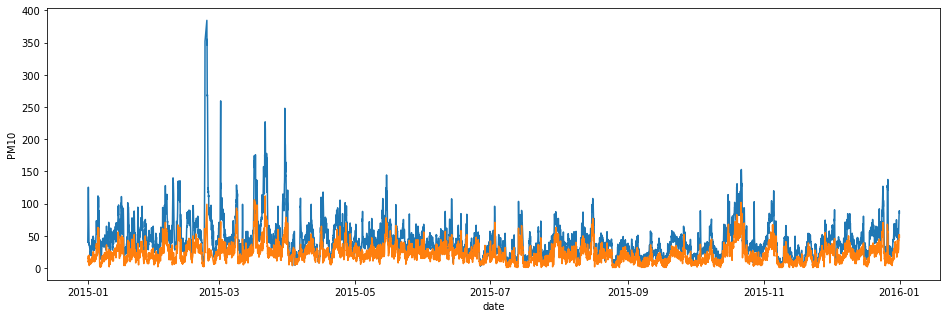

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
sns.lineplot(y=df_2015['PM10'], x=df_2015['date'])
sns.lineplot(y=df_2015['PM25'], x=df_2015['date'])
plt.xlabel('date')
plt.ylabel('PM10')
plt.show()

In [107]:
df_fin2

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,date
date,,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.30,0.0200,0.0090,40.0,NaN,-7.4,0.0,33.0,33.0,2.643416,-3.886174,2015-01-01 01:00:00
2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805,2015-01-01 02:00:00
2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013,2015-01-01 03:00:00
2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544,2015-01-01 04:00:00
2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020,2015-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232,2020-10-31 20:00:00
2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903,2020-10-31 21:00:00
2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573,2020-10-31 22:00:00


In [108]:
#interpolate 예제
from pandas import DataFrame, Series

datestrs = ['12/1/2016', '12/03/2016', '12/04/2016', '12/10/2016']
dates = pd.to_datetime(datestrs)

ts = Series([1, np.nan, np.nan, 10], index=dates)
ts

2016-12-01     1.0
2016-12-03     NaN
2016-12-04     NaN
2016-12-10    10.0
dtype: float64

In [109]:
ts_int = ts.interpolate(method='values')
ts_int

2016-12-01     1.0
2016-12-03     3.0
2016-12-04     4.0
2016-12-10    10.0
dtype: float64

In [110]:
#interpolate 선형 그래프로 결측값 보간
df_fin3 = df_fin2.interpolate(method='values')
df_fin3

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,date
date,,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.30,0.0200,0.0090,40.0,NaN,-7.4,0.0,33.0,33.0,2.643416,-3.886174,2015-01-01 01:00:00
2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805,2015-01-01 02:00:00
2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013,2015-01-01 03:00:00
2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544,2015-01-01 04:00:00
2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020,2015-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232,2020-10-31 20:00:00
2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903,2020-10-31 21:00:00
2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573,2020-10-31 22:00:00


In [111]:
df_fin4 = df_fin3.dropna(how='any')
df_fin4

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,date
date,,,,,,,,,,,,,
2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805,2015-01-01 02:00:00
2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013,2015-01-01 03:00:00
2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544,2015-01-01 04:00:00
2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020,2015-01-01 05:00:00
2015-01-01 06:00:00,0.0065,0.45,0.0190,0.0080,114.0,18.0,-9.3,0.0,36.0,36.0,2.980873,-4.382282,2015-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232,2020-10-31 20:00:00
2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903,2020-10-31 21:00:00
2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573,2020-10-31 22:00:00


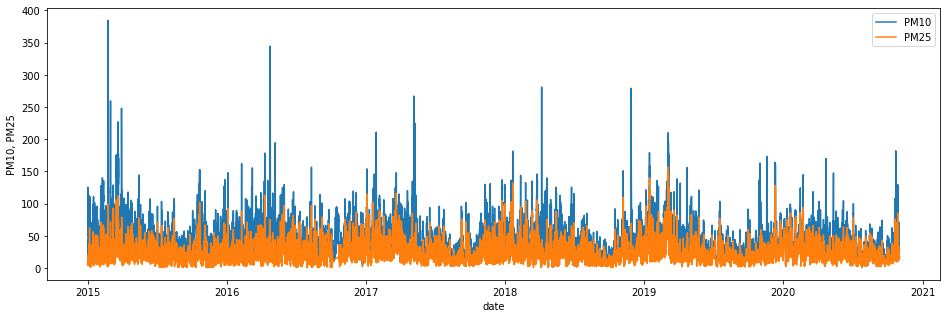

In [112]:
plt.figure(figsize=(16,5))
sns.lineplot(y=df_fin4['PM10'], x=df_fin4['date'])
sns.lineplot(y=df_fin4['PM25'], x=df_fin4['date'])
plt.xlabel('date')
plt.ylabel('PM10, PM25')
plt.legend(['PM10','PM25'])
plt.show()

In [113]:
df_fin4.corr()

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
SO2,1.000000,0.365862,-0.062242,0.445636,0.429785,0.316117,-0.147425,-0.066907,-0.151944,-0.151944,-0.003564,0.056843
CO,0.365862,1.000000,-0.365379,0.724043,0.490207,0.557435,-0.267725,-0.050503,0.020539,0.020539,-0.152904,0.004794
O3,-0.062242,-0.365379,1.000000,-0.409227,0.031503,0.015518,0.426847,-0.030043,-0.307264,-0.307264,0.122136,0.104596
NO2,0.445636,0.724043,-0.409227,1.000000,0.431514,0.443621,-0.133605,-0.045556,-0.050170,-0.050170,-0.186178,0.041701
PM10,0.429785,0.490207,0.031503,0.431514,1.000000,0.828539,-0.156166,-0.081147,-0.101174,-0.101174,0.001331,0.103536
PM25,0.316117,0.557435,0.015518,0.443621,0.828539,1.000000,-0.118520,-0.062318,0.027282,0.027282,-0.041694,0.095114
tem,-0.147425,-0.267725,0.426847,-0.133605,-0.156166,-0.118520,1.000000,0.059639,0.156694,0.156694,-0.137514,0.122468
rain,-0.066907,-0.050503,-0.030043,-0.045556,-0.081147,-0.062318,0.059639,1.000000,0.205987,0.205987,-0.020883,0.010315
hum,-0.151944,0.020539,-0.307264,-0.050170,-0.101174,0.027282,0.156694,0.205987,1.000000,1.000000,-0.132845,0.034258
pre,-0.151944,0.020539,-0.307264,-0.050170,-0.101174,0.027282,0.156694,0.205987,1.000000,1.000000,-0.132845,0.034258


In [114]:
df_new = df_fin4.copy()
df_new

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,date
date,,,,,,,,,,,,,
2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805,2015-01-01 02:00:00
2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013,2015-01-01 03:00:00
2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544,2015-01-01 04:00:00
2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020,2015-01-01 05:00:00
2015-01-01 06:00:00,0.0065,0.45,0.0190,0.0080,114.0,18.0,-9.3,0.0,36.0,36.0,2.980873,-4.382282,2015-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232,2020-10-31 20:00:00
2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903,2020-10-31 21:00:00
2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573,2020-10-31 22:00:00


In [115]:
df_new.index

DatetimeIndex(['2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               '2015-01-01 10:00:00', '2015-01-01 11:00:00',
               ...
               '2020-10-31 15:00:00', '2020-10-31 16:00:00',
               '2020-10-31 17:00:00', '2020-10-31 18:00:00',
               '2020-10-31 19:00:00', '2020-10-31 20:00:00',
               '2020-10-31 21:00:00', '2020-10-31 22:00:00',
               '2020-10-31 23:00:00', '2020-11-01 00:00:00'],
              dtype='datetime64[ns]', name='date', length=51124, freq=None)

In [116]:
df_new['Year'] = df_new.index.year
df_new['Month'] = df_new.index.month
df_new['Day'] = df_new.index.day
df_new['Hour'] = df_new.index.hour
df_new

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,date,Year,Month,Day,Hour
date,,,,,,,,,,,,,,,,,
2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805,2015-01-01 02:00:00,2015,1,1,2
2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013,2015-01-01 03:00:00,2015,1,1,3
2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544,2015-01-01 04:00:00,2015,1,1,4
2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020,2015-01-01 05:00:00,2015,1,1,5
2015-01-01 06:00:00,0.0065,0.45,0.0190,0.0080,114.0,18.0,-9.3,0.0,36.0,36.0,2.980873,-4.382282,2015-01-01 06:00:00,2015,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232,2020-10-31 20:00:00,2020,10,31,20
2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903,2020-10-31 21:00:00,2020,10,31,21
2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573,2020-10-31 22:00:00,2020,10,31,22


In [117]:
df_fin2

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,date
date,,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.30,0.0200,0.0090,40.0,NaN,-7.4,0.0,33.0,33.0,2.643416,-3.886174,2015-01-01 01:00:00
2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805,2015-01-01 02:00:00
2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013,2015-01-01 03:00:00
2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544,2015-01-01 04:00:00
2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020,2015-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232,2020-10-31 20:00:00
2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903,2020-10-31 21:00:00
2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573,2020-10-31 22:00:00


In [118]:
new = df_fin2.drop('date', axis=1)
new

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
date,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.30,0.0200,0.0090,40.0,NaN,-7.4,0.0,33.0,33.0,2.643416,-3.886174
2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805
2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013
2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544
2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232
2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903
2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573


In [119]:
new1 = new.interpolate(method='values')
new1

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
date,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.30,0.0200,0.0090,40.0,NaN,-7.4,0.0,33.0,33.0,2.643416,-3.886174
2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805
2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013
2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544
2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232
2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903
2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573


In [120]:
new2 = new1.dropna(how='any')
new2

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
date,,,,,,,,,,,,
2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805
2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013
2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544
2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020
2015-01-01 06:00:00,0.0065,0.45,0.0190,0.0080,114.0,18.0,-9.3,0.0,36.0,36.0,2.980873,-4.382282
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232
2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903
2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573


In [121]:
new3 = new2.reset_index()

In [122]:
pm = new3['PM10']
pm1 = pm[24:]
pm10 = pm1.reset_index()

In [123]:
new3['pm10_tomm'] = pm10['PM10']
new3

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,pm10_tomm
0,2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805,24.0
1,2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013,21.0
2,2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544,20.0
3,2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020,22.0
4,2015-01-01 06:00:00,0.0065,0.45,0.0190,0.0080,114.0,18.0,-9.3,0.0,36.0,36.0,2.980873,-4.382282,24.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232,NaN
51120,2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903,NaN
51121,2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573,NaN
51122,2020-10-31 23:00:00,0.0040,0.50,0.0320,0.0210,26.5,16.5,14.9,0.0,54.0,54.0,0.974375,1.746595,NaN


In [124]:
new4 = new3.dropna(how='any')

In [125]:
grade = []
for each in new4['PM10']:
  if each <=30:
    grade.append(0)
  elif each <=80:
    grade.append(1)
  elif each <=150:
    grade.append(2)
  else:
    grade.append(3)

In [126]:
grade_pm_tomm = grade[1:]
grade_pm_tomm.append(np.nan)
new4['grade_pm_tomm'] = grade_pm_tomm
new5 = new4.dropna(how='any')
new6 = new5.set_index('date')
new7 = new6.drop('pm10_tomm', axis=1)
new7.to_excel('/content/drive/My Drive/Data/final_data.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [127]:
pm = new7['PM10']
pm1 = pm[1:]
pm10 = pm1.reset_index()
pm10

,date,PM10
0,2015-01-01 03:00:00,68.0
1,2015-01-01 04:00:00,80.0
2,2015-01-01 05:00:00,97.5
3,2015-01-01 06:00:00,114.0
4,2015-01-01 07:00:00,125.5
...,...,...
51093,2020-10-30 19:00:00,60.5
51094,2020-10-30 20:00:00,57.5
51095,2020-10-30 21:00:00,61.0
51096,2020-10-30 22:00:00,58.5


In [128]:
new_pm = new7.reset_index()
new_pm['value_pm_tomm'] = pm10['PM10']

In [129]:
new_pm.head()

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,grade_pm_tomm,value_pm_tomm
0,2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805,1.0,68.0
1,2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013,1.0,80.0
2,2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544,2.0,97.5
3,2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020,2.0,114.0
4,2015-01-01 06:00:00,0.0065,0.45,0.0190,0.0080,114.0,18.0,-9.3,0.0,36.0,36.0,2.980873,-4.382282,2.0,125.5


In [130]:
X = new7[['SO2',	'CO',	'O3',	'NO2',	'PM10',	'PM25',	'tem'	,'rain',	'hum',	'pre',	'wind_x',	'wind_y']]
y = new7['grade_pm_tomm']

In [131]:
x_train = X[:26283]
x_val = X[26283:43803]
x_test = X[43803:]
y_train = y[:26283]
y_val = y[26283:43803]
y_test = y[43803:]

In [132]:
x_train_np = np.array(x_train)
x_val_np = np.array(x_val)
x_test_np = np.array(x_test)
y_train_np = np.array(y_train)
y_val_np = np.array(y_val)
y_test_np = np.array(y_test)

In [133]:
batch_size= 5

In [134]:
N = BUFFER_SIZE = len(y_train_np)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.repeat()
train_dataset

<RepeatDataset shapes: ((None, 12), (None,)), types: (tf.float64, tf.float64)>

In [135]:
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(batch_size)
val_dataset = val_dataset.repeat()

In [136]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(batch_size)

In [137]:
new_pm.head()

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,grade_pm_tomm,value_pm_tomm
0,2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805,1.0,68.0
1,2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013,1.0,80.0
2,2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544,2.0,97.5
3,2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020,2.0,114.0
4,2015-01-01 06:00:00,0.0065,0.45,0.0190,0.0080,114.0,18.0,-9.3,0.0,36.0,36.0,2.980873,-4.382282,2.0,125.5


In [138]:
new_pm1 = new_pm.drop(['grade_pm_tomm'], axis=1)
new_pm1 = new_pm1.dropna(how='any')
new_pm2 = new_pm1.drop('value_pm_tomm', axis=1)
new_pm2.head()

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
0,2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805
1,2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013
2,2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544
3,2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020
4,2015-01-01 06:00:00,0.0065,0.45,0.0190,0.0080,114.0,18.0,-9.3,0.0,36.0,36.0,2.980873,-4.382282


In [139]:
train = df_new[:26283]
val = df_new[26283:43803]
test = df_new[43803:]

In [140]:
train = train.set_index('date')
val = val.set_index('date')
test = test.set_index('date')

In [141]:
df_new

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,date,Year,Month,Day,Hour
date,,,,,,,,,,,,,,,,,
2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805,2015-01-01 02:00:00,2015,1,1,2
2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013,2015-01-01 03:00:00,2015,1,1,3
2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544,2015-01-01 04:00:00,2015,1,1,4
2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020,2015-01-01 05:00:00,2015,1,1,5
2015-01-01 06:00:00,0.0065,0.45,0.0190,0.0080,114.0,18.0,-9.3,0.0,36.0,36.0,2.980873,-4.382282,2015-01-01 06:00:00,2015,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232,2020-10-31 20:00:00,2020,10,31,20
2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903,2020-10-31 21:00:00,2020,10,31,21
2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573,2020-10-31 22:00:00,2020,10,31,22


In [142]:
mean = train.mean()
std = train.std()

train_scaled = (train - mean) / std
val_scaled = (val-mean) / std
test_scaled = (test-mean) / std

train_scaled = train_scaled.reset_index()
val_scaled = val_scaled.reset_index()
test_scaled = test_scaled.reset_index()

In [143]:
value_tomm_pm = new_pm1['value_pm_tomm']
train_y = value_tomm_pm[:26283]
train_y = train_y.reset_index()
val_y = value_tomm_pm[26283:43803]
val_y = val_y.reset_index()
test_y = value_tomm_pm[43803:]
test_y = test_y.reset_index()

In [144]:
train_scaled['value_tomm'] = train_y['value_pm_tomm']
val_scaled['value_tomm'] = val_y['value_pm_tomm']
test_scaled['value_tomm'] = test_y['value_pm_tomm']

In [145]:
train_scaled = train_scaled.dropna(how='any')
val_scaled = val_scaled.dropna(how='any')
test_scaled = test_scaled.dropna(how='any')

In [146]:
train_shuffled = train_scaled.iloc[np.random.permutation(train_scaled.index)].reset_index(drop=True)
train_shuffled.head()

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,Year,Month,Day,Hour,value_tomm
0,2017-05-07 19:00:00,-1.197547,-1.012387,1.465848,-1.046781,0.183385,-0.876574,0.454701,-0.105216,-1.914026,-1.914026,2.434746,0.575480,1.224548,-0.442462,-0.991665,1.083326,42.0
1,2016-11-24 06:00:00,-0.770586,-1.012387,-0.220813,-0.873610,-0.888759,-0.809561,-1.743267,-0.105216,-0.247353,-0.247353,0.686986,0.286351,-0.000979,1.297703,0.939695,-0.794863,23.5
2,2016-03-02 15:00:00,3.072063,0.185424,0.432088,0.165417,0.495282,0.072416,-0.496257,-0.105216,-0.499879,-0.499879,1.910418,0.488741,-0.000979,-1.022517,-1.559711,0.505422,58.0
3,2017-07-12 21:00:00,-1.197547,-1.012387,0.214455,-0.238649,-0.713318,-0.407483,1.163433,-0.105216,0.863762,0.863762,0.279175,0.218887,1.224548,0.137593,-0.423618,1.372278,21.0
4,2017-08-29 08:00:00,-1.197547,-1.012387,0.323271,-1.624018,-1.259137,-1.211639,0.436758,-0.105216,-0.550385,-0.550385,1.729887,-1.822183,1.224548,0.427620,1.507741,-0.505911,10.0


In [147]:
feature_col = ['PM10','PM25','SO2','CO','O3','NO2','tem','rain','hum','pre','wind_x','wind_y']
label_col = ['value_tomm']

In [148]:
train_feature = train_scaled[feature_col]
train_label = train_scaled[label_col]
valid_feature = val_scaled[feature_col]
valid_label = val_scaled[label_col]
test_feature = test_scaled[feature_col]
test_label = test_scaled[label_col]
print(train_feature.shape, train_label.shape)

(26283, 12) (26283, 1)


In [149]:
train_feature.shape

(26283, 12)

In [150]:
from tensorflow.keras import layers
from tensorflow import keras

model = tf.keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_feature.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model

In [151]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-deepneural-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True, monitor='val_loss')
#patience = 성능이 증가하지 않는 epoch 몇번까지 허용하는지
history = model.fit(train_feature, train_label,
          validation_data=(valid_feature,valid_label),
          epochs=50,
          callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/50
822/822 [==============================] - 2s 2ms/step - loss: 958.3006 - mae: 21.7762 - val_loss: 60.0315 - val_mae: 5.7037
Epoch 2/50
822/822 [==============================] - 2s 2ms/step - loss: 61.5640 - mae: 5.5151 - val_loss: 39.3215 - val_mae: 4.2862
Epoch 3/50
822/822 [==============================] - 2s 2ms/step - loss: 45.8968 - mae: 4.5106 - val_loss: 33.9639 - val_mae: 3.8361
Epoch 4/50
822/822 [==============================] - 2s 2ms/step - loss: 43.6117 - mae: 4.3902 - val_loss: 33.4851 - val_mae: 3.8295
Epoch 5/50
822/822 [==============================] - 2s 2ms/step - loss: 43.7765 - mae: 4.3208 - val_loss: 32.6551 - val_mae: 3.7316
Epoch 6/50
822/822 [==============================] - 2s 2ms/step - loss: 43.1255 - mae: 4.2937 - val_loss: 33.4838 - val_mae: 3.7496
Epoch 7/50
822/822 [==============================] - 2s 2ms/step - loss: 42.0707 - mae: 4.2612 - val_loss: 33.7037 - val_mae: 3.8589
Epoch 8/50
822/822 [==============================] - 2s 2ms

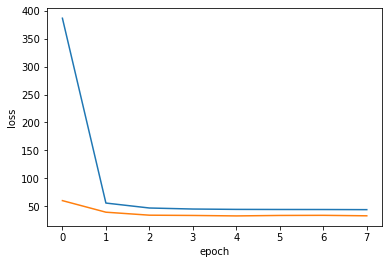

In [152]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [153]:
pred = model.predict(test_feature)
print('Loss', model.evaluate(test_feature, test_label))

228/228 [==============================] - 0s 1ms/step - loss: 27.2142 - mae: 3.5161
Loss [27.21420669555664, 3.5160634517669678]


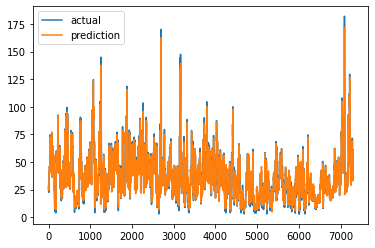

In [154]:
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

####LSTM

In [155]:
mean = train.mean()
std = train.std()

train_scaled = (train - mean) / std
val_scaled = (val-mean) / std
test_scaled = (test-mean) / std

train_scaled = train_scaled.reset_index()
val_scaled = val_scaled.reset_index()
test_scaled = test_scaled.reset_index()

In [156]:
value_tomm_pm = new_pm1['value_pm_tomm']
train_y = value_tomm_pm[:26283]
train_y = train_y.reset_index()
val_y = value_tomm_pm[26283:43803]
val_y = val_y.reset_index()
test_y = value_tomm_pm[43803:]
test_y = test_y.reset_index()

In [157]:
train_scaled['value_tomm'] = train_y['value_pm_tomm']
val_scaled['value_tomm'] = val_y['value_pm_tomm']
test_scaled['value_tomm'] = test_y['value_pm_tomm']

In [158]:
train_scaled = train_scaled.dropna(how='any')
val_scaled = val_scaled.dropna(how='any')
test_scaled = test_scaled.dropna(how='any')

In [159]:
train_shuffled = train_scaled.iloc[np.random.permutation(train_scaled.index)].reset_index(drop=True)
train_shuffled.head()

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,Year,Month,Day,Hour,value_tomm
0,2016-11-16 22:00:00,-0.343625,0.185424,-1.091348,1.348753,-0.109018,-0.005405,-0.702596,-0.105216,-0.600890,-0.600890,-0.303412,0.122511,-0.000979,1.297703,0.030820,1.516754,40.0
1,2015-12-04 22:00:00,0.723777,0.385059,-1.064144,0.742654,-0.109018,-0.943587,-1.178075,-0.105216,0.459720,0.459720,-0.361671,0.112873,-1.226506,1.587731,-1.332493,1.516754,36.0
2,2015-10-28 23:00:00,0.510297,-0.613117,-0.057588,-1.017919,-0.830279,-1.077613,-0.541113,-0.105216,-0.550385,-0.550385,-1.005547,-1.037729,-1.226506,1.007676,1.394132,1.661230,18.0
3,2017-02-19 21:00:00,-1.197547,-0.213846,-0.057588,0.454035,-0.050537,0.329660,-0.720539,0.261425,1.217299,1.217299,-1.786361,1.468177,1.224548,-1.312545,0.371648,1.372278,39.0
4,2015-01-06 22:00:00,0.083336,-1.212022,0.078433,-1.306538,-0.888759,-1.010600,-1.850922,-0.105216,-0.752406,-0.752406,0.071582,-1.434692,-1.226506,-1.602572,-1.105274,1.516754,15.0


In [160]:
def lstm_dataset(data, label, window_size=24):
  feature_list = []
  label_list = []

  for i in range(len(data) - window_size):
    feature_list.append(np.array(data.iloc[i:i+window_size]))
    label_list.append(np.array(label.iloc[i+window_size]))
  return np.array(feature_list), np.array(label_list)
  # window_size = timestep(몇 시간의 데이터를 이용하여 예측을 할 것인가)

In [161]:
feature_cols = ['PM10', 'PM25','SO2','CO','NO2','tem','rain','hum','pre','wind_x','wind_y']
label_cols = ['value_tomm']

train_feature = train_scaled[feature_cols]
train_label = train_scaled[label_cols]

In [162]:
train_feature, train_label = lstm_dataset(train_feature, train_label, window_size= 24)

In [163]:
train_label.shape

(26259, 1)

In [164]:
valid_feature = val_scaled[feature_cols]
valid_label = val_scaled[label_cols]
test_feature = test_scaled[feature_cols]
test_label = test_scaled[label_cols]

test_feature.shape, test_label.shape

((7295, 11), (7295, 1))

In [165]:
valid_feature, valid_label = lstm_dataset(valid_feature, valid_label, 24)
test_feature, test_label = lstm_dataset(test_feature, test_label, 24)

In [166]:
print(test_feature.shape)

(7271, 24, 11)


In [167]:
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential

model = tf.keras.models.Sequential()
model.add(LSTM(64,
               input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(layers.Flatten(input_shape=(16,16)))
model.add(layers.Flatten(input_shape=(2,2)))
model.add(Dense(1))

In [168]:
import os
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('tmp_checkpoint.h5')
early_stop = EarlyStopping(monitor='val_loss',patience=3)

history = model.fit(train_feature, train_label,
                    epochs=50,
                    batch_size=256,
                    validation_data=(valid_feature, valid_label),
                    callbacks=[early_stop, checkpoint_cb])

Epoch 1/50
103/103 [==============================] - 11s 90ms/step - loss: 1733.7734 - mae: 32.5964 - val_loss: 233.6782 - val_mae: 10.5667
Epoch 2/50
103/103 [==============================] - 9s 84ms/step - loss: 239.8704 - mae: 10.0958 - val_loss: 185.7555 - val_mae: 9.1381
Epoch 3/50
103/103 [==============================] - 9s 85ms/step - loss: 169.0047 - mae: 8.5408 - val_loss: 137.7607 - val_mae: 7.4356
Epoch 4/50
103/103 [==============================] - 9s 85ms/step - loss: 124.7047 - mae: 7.4736 - val_loss: 101.0938 - val_mae: 6.3686
Epoch 5/50
103/103 [==============================] - 9s 85ms/step - loss: 122.3708 - mae: 7.3286 - val_loss: 106.1944 - val_mae: 7.1069
Epoch 6/50
103/103 [==============================] - 9s 85ms/step - loss: 110.6638 - mae: 6.8363 - val_loss: 100.2049 - val_mae: 6.7225
Epoch 7/50
103/103 [==============================] - 9s 85ms/step - loss: 112.7666 - mae: 7.1195 - val_loss: 95.5306 - val_mae: 6.2898
Epoch 8/50
103/103 [=================

In [169]:
pred = model.predict(test_feature)
print('Loss', model.evaluate(test_feature, test_label))

228/228 [==============================] - 1s 6ms/step - loss: 67.5962 - mae: 5.5036
Loss [67.59619903564453, 5.503571510314941]


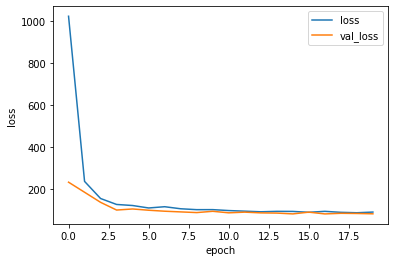

In [170]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

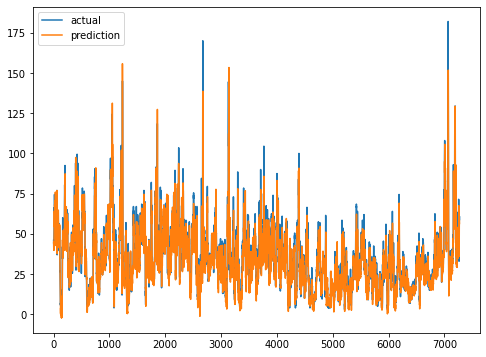

In [171]:
plt.figure(figsize=(8,6))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

####GRU

In [172]:
from keras.layers import GRU

batch_size = 128
model = Sequential()
model.add(GRU(64, input_shape=(train_feature.shape[1], train_feature.shape[2]), activation = 'relu', return_sequences=True))
model.add(GRU(32, activation='relu'))
model.add(layers.Flatten(input_shape=(16,16)))
model.add(layers.Flatten(input_shape=(2,2)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
es = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=0, mode='auto')
checkpoint_cb = keras.callbacks.ModelCheckpoint('tmp_checkpoint.h5')

In [173]:
history = model.fit(train_feature, train_label,
                    epochs=50,
                    batch_size=256,
                    validation_data=(valid_feature, valid_label),
                    callbacks=[es, checkpoint_cb])

Epoch 1/50
103/103 [==============================] - 10s 75ms/step - loss: 1782.8050 - mae: 32.9615 - val_loss: 206.7542 - val_mae: 9.7597
Epoch 2/50
103/103 [==============================] - 7s 71ms/step - loss: 229.1238 - mae: 9.7736 - val_loss: 142.8468 - val_mae: 7.6504
Epoch 3/50
103/103 [==============================] - 7s 69ms/step - loss: 171.1642 - mae: 8.2048 - val_loss: 124.6470 - val_mae: 7.1318
Epoch 4/50
103/103 [==============================] - 7s 71ms/step - loss: 145.4016 - mae: 7.5744 - val_loss: 111.1507 - val_mae: 6.6119
Epoch 5/50
103/103 [==============================] - 7s 71ms/step - loss: 133.7560 - mae: 7.4156 - val_loss: 104.3248 - val_mae: 6.3919
Epoch 6/50
103/103 [==============================] - 7s 71ms/step - loss: 116.6021 - mae: 6.8380 - val_loss: 94.1295 - val_mae: 6.1646
Epoch 7/50
103/103 [==============================] - 7s 70ms/step - loss: 119.4025 - mae: 6.8996 - val_loss: 91.1802 - val_mae: 6.0176
Epoch 8/50
103/103 [====================

In [174]:
pred = model.predict(test_feature)
print('Loss', model.evaluate(test_feature, test_label))

228/228 [==============================] - 1s 5ms/step - loss: 62.6974 - mae: 5.3733
Loss [62.6973876953125, 5.373342990875244]


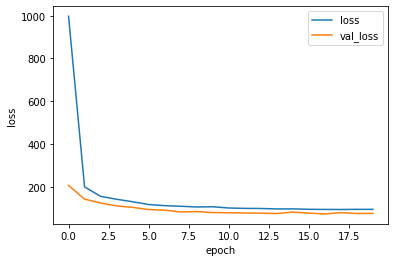

In [175]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

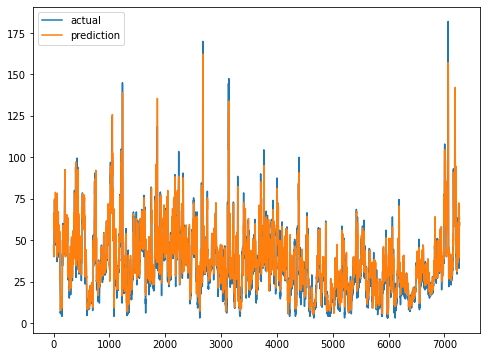

In [176]:
plt.figure(figsize=(8,6))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

### tensor 이용

In [177]:
value_tomm_pm = new_pm1['value_pm_tomm']
train_y = value_tomm_pm[:26283]
train_y = train_y.reset_index()
val_y = value_tomm_pm[26283:43803]
val_y = val_y.reset_index()
test_y = value_tomm_pm[43803:]
test_y = test_y.reset_index()

In [178]:
train_scaled['value_tomm'] = train_y['value_pm_tomm']
val_scaled['value_tomm'] = val_y['value_pm_tomm']
test_scaled['value_tomm'] = test_y['value_pm_tomm']

In [179]:
def make_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('value_tomm')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))

  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [180]:
train_scaled.shape

(26283, 18)

In [181]:
train_scaled = train_scaled.set_index('date')
val_scaled = val_scaled.set_index('date')
test_scaled = test_scaled.set_index('date')

In [182]:
batch_size=512
train_ds = make_dataset(train_scaled, batch_size=batch_size)
val_ds = make_dataset(val_scaled, shuffle=False, batch_size = batch_size)
test_ds = make_dataset(test_scaled, shuffle=False, batch_size=batch_size)

In [183]:
train_scaled.pop('value_tomm').shape

(26283,)

In [184]:
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

In [185]:
feature_columns = []
for header in ['SO2'	,'CO'	,'O3',	'NO2',	'PM10',	'PM25',	'tem',	'rain',	'hum',	'pre',	'wind_x',	'wind_y']:
  feature_columns.append(feature_column.numeric_column(header))

In [186]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [187]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras import layers
from tensorflow.keras import initializers
initializer = tf.keras.initializers.he_normal(seed=None)

model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(units=64, kernel_initializer='he_normal',
    bias_initializer='zeros', activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(units=32, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(units=1, activation='relu')
])
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [188]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-deepneural-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_ds,
          validation_data=val_ds,
          epochs=50,
          callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/50
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
46/52 [=========================>....] - ETA: 0s - loss: 2379.2894 - mae: 41.7581WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'SO2': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=float64>, 'CO': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=float64>, 'O3': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dtype=float64>, 'NO2': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=float64>, 'PM10': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=float64>, 'PM25': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=float64>, 'tem': <tf.Tensor 'ExpandDims_13:0' shape=(None, 1) dtype=float64>, 'rain': <tf.Tensor 'ExpandDims_12:0' shape=(None, 1) dtype=float64>, 'hum': <tf.Tensor 'ExpandDims_10:0' shape=(None, 1) dtype=float64>, 'pre': <tf.Tensor 'ExpandDims_11:0' shape=(None, 1) dtype=float64

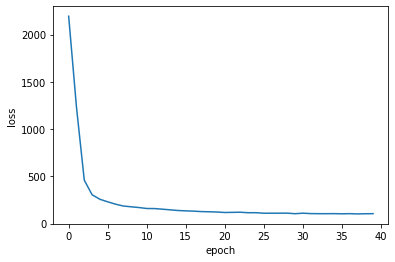

In [189]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [190]:
pred = model.predict(test_ds)

Consider rewriting this model with the Functional API.


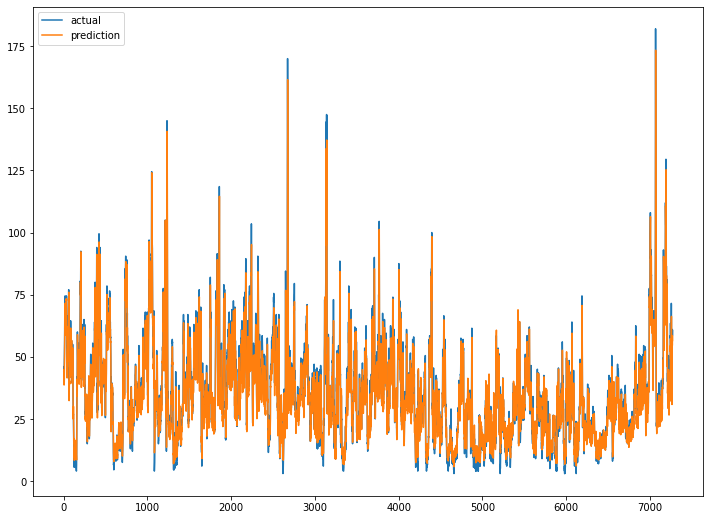

In [191]:
plt.figure(figsize=(12,9))
plt.plot(test_label, label='actual')
plt.plot(pred[24:], label='prediction')
plt.legend()
plt.show()

###Xavier initializer 제거

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras import layers
from tensorflow.keras import initializers

model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(units=100, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(units=100, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(units=1, activation='relu')
])
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-deepneural-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_ds,
          validation_data=val_ds,
          epochs=50,
          callbacks = [checkpoint_cb, early_stopping_cb])

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
pred = model.predict(test_ds)

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.show()

###xavier initialization

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers

layer = layers.Dense(
    units=64,
    kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer = initializers.Zeros()
)

In [ ]:
layer = layers.Dense(
    units=64,
    kernel_initializer='random_normal',
    bias_initializer='zeros'
)

In [ ]:
tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

In [ ]:
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
values = initializer(shape=(2,2))

In [ ]:
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)